In [2]:
import pandas as pd
import numpy as np
import random
from preprocess_no_eth_ip_classification import process_df
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import keras

normal_df = pd.read_csv('../data/normal1.csv')
processed_normal = process_df(normal_df)

attack_df = pd.read_csv('../data/attack1.csv')
processed_attack = process_df(attack_df)

In [3]:
x_normal_train, x_normal_test = train_test_split(processed_normal.values, test_size=0.2, random_state=42)

In [4]:
processed_attack

,octet_1_ip_src,octet_2_ip_src,octet_3_ip_src,octet_4_ip_src,octet_1_ip_dst,octet_2_ip_dst,octet_3_ip_dst,octet_4_ip_dst,length,protocol.sport,protocol.dport,source_pod,source_external,destination_pod,destination_external,TCP,UDP,packet_flow
0,-0.056227,-0.147327,-0.114570,-0.670627,-0.215435,0.247127,-0.236432,-0.456078,-0.122614,-0.711639,1.467484,0.0,1.0,1.0,0.0,1.0,0.0,-2.885447
1,-0.056227,0.116468,-0.114570,-0.487903,0.375614,-3.334647,6.111377,4.519372,-0.005414,0.570995,-0.634366,1.0,0.0,0.0,1.0,1.0,0.0,-2.885447
2,1.648743,-7.665477,9.166199,9.074635,-0.215435,0.247127,-0.236432,-0.456078,-0.106387,-0.771593,0.701942,0.0,1.0,1.0,0.0,1.0,0.0,-2.885447
3,-0.056227,0.116468,-0.114570,-0.487903,0.375614,-3.334647,6.111377,4.519372,-0.225390,0.570995,-0.634366,1.0,0.0,0.0,1.0,1.0,0.0,-2.885447
4,-0.056227,0.116468,-0.114570,-0.487903,-0.215435,0.125711,-0.236432,-0.551151,-0.225390,1.340134,-0.574692,1.0,0.0,0.0,1.0,1.0,0.0,-2.885447
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1070549,26.882303,-11.820245,5.901607,0.060267,-0.215435,0.247127,-0.236432,-0.392697,-0.074833,-1.200721,1.605593,0.0,1.0,1.0,0.0,0.0,1.0,-2.998014
1070550,-0.056227,0.116468,-0.114570,-0.366088,-0.215435,0.247127,-0.236432,-0.329315,0.027041,-1.200721,1.315722,1.0,0.0,1.0,0.0,0.0,1.0,-2.998014
1070551,0.455264,-11.424553,3.010111,2.801122,-0.215435,0.247127,-0.236432,-0.329315,-0.225390,-1.182015,1.184583,0.0,1.0,1.0,0.0,1.0,0.0,-2.998014
1070552,-0.056227,0.116468,-0.114570,-0.244272,-0.038121,-5.064825,1.900770,1.255223,-0.236208,1.055904,-1.042868,1.0,0.0,0.0,1.0,1.0,0.0,-2.998014


In [5]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Activation

# model = Sequential()
# model.add(Dense(10, input_dim=processed_normal.values.shape[1], activation='LeakyReLU'))
# model.add(Dense(3, activation='LeakyReLU')) # size to compress to
# model.add(Dense(10, activation='LeakyReLU'))
# model.add(Dense(processed_normal.values.shape[1])) # Multiple output neurons
# model.compile(loss='mean_squared_error', optimizer='adam')
# model.fit(x_normal_train,x_normal_train,verbose=1,epochs=20)
# model.save("now_not_so_basic_model_v2")
model = keras.models.load_model('now_not_so_basic_model_v2')

Metal device set to: Apple M1 Pro


2022-03-27 02:41:04.806994: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-03-27 02:41:04.807118: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
from sklearn import metrics
pred_normal_train = model.predict(x_normal_train)
print(np.sqrt(metrics.mean_squared_error(pred_normal_train,x_normal_train)))

pred_normal_test = model.predict(x_normal_test)
print(np.sqrt(metrics.mean_squared_error(pred_normal_test,x_normal_test)))

2022-03-27 02:41:04.979177: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-03-27 02:41:05.010586: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


0.1809087058156798
0.18007366740210773


In [7]:
pro_values = processed_attack.values
pred_attack = model.predict(pro_values)

<AxesSubplot:>

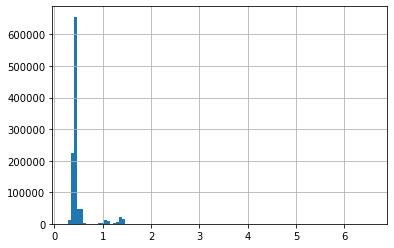

In [8]:
score_list = []
for index, x in enumerate(pred_attack):
    score_list.append(np.sqrt(metrics.mean_squared_error(pred_attack[index],pro_values[index])))

attack_df['score'] = score_list
attack_df['score'].hist(bins = 100)

1.36579963032951

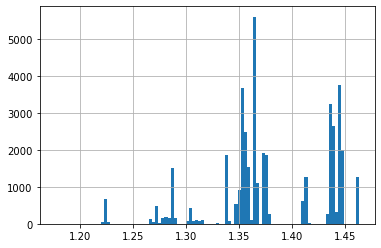

In [9]:
nmap_df = attack_df[attack_df["ip.dst"] == '89.100.107.148']


# In[15]:


nmap_df['score'].hist(bins = 100)


# In[20]:


nmap_df['score'].median()

1.44412149629757

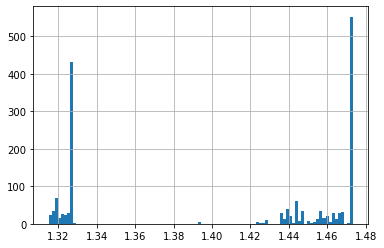

In [10]:
wordpress = attack_df[attack_df["ip.dst"] == '89.100.107.147']


# In[15]:
wordpress['score'].hist(bins = 100)


# In[20]:
wordpress['score'].median()

In [12]:
attack_df['score'].describe().apply(lambda x: format(x, 'f'))

count    1070554.000000
mean           0.488171
std            0.230004
min            0.274564
25%            0.404716
50%            0.426432
75%            0.447615
max            6.573879
Name: score, dtype: object

In [13]:
nmap_df['score'].describe().apply(lambda x: format(x, 'f'))

count    41824.000000
mean         1.380329
std          0.053284
min          1.176635
25%          1.354040
50%          1.365800
75%          1.437380
max          1.463493
Name: score, dtype: object

In [14]:
attack_df['score'].quantile(0.97)

1.3551917937906417

In [15]:
41824/1070554

0.03906762293167836

In [16]:
anomalous_dict = attack_df[attack_df['score'] > 1.355]

In [17]:
anomalous_dict['ip.dst'].value_counts()

89.100.107.148     28977
89.100.107.147       990
10.244.0.2           777
168.63.129.16        646
10.244.0.11          600
10.244.0.15          199
142.250.179.138       57
10.244.0.6            51
66.249.81.204         45
198.143.164.251       38
20.126.199.164        29
52.236.186.218        29
198.143.164.243       24
66.249.81.206         15
169.254.169.254       12
172.217.168.234        9
216.58.214.14          8
45.83.65.187           8
142.250.179.142        6
13.69.65.27            4
40.113.176.128         3
13.69.65.29            2
13.69.65.31            2
Name: ip.dst, dtype: int64

In [18]:
28977/41824

0.6928318668706962

In [19]:
len(anomalous_dict)

32531

<AxesSubplot:>

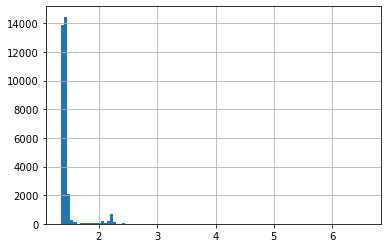

In [20]:
anomalous_dict['score'].hist(bins = 100)

<AxesSubplot:>

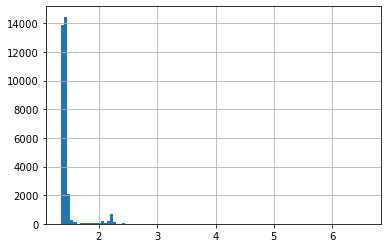

In [21]:
anomalous_dict['score'].hist(bins = 100)

In [23]:
time_analysis = normal_df.copy()

In [28]:
time_analysis['timestamp'].describe().apply(lambda x: format(x, 'f'))

count        140538.000000
mean     1647531756.040059
std             178.428050
min      1647531462.379940
25%      1647531589.512600
50%      1647531759.449429
75%      1647531912.643675
max      1647532060.965540
Name: timestamp, dtype: object

In [33]:
time_analysis['timestamp_int'] = time_analysis['timestamp'].astype('int') #this is in seconds

In [37]:
min_timestamp = time_analysis['timestamp_int'].min()
max_timestamp = time_analysis['timestamp_int'].max()

In [35]:
min_timestamp

1647531462

In [36]:
interval = 10 # ten seconds

In [38]:
max_timestamp

1647532060

In [39]:
max_timestamp - min_timestamp

598

In [42]:
time_analysis['packet_flow_10_s'] = 0

In [43]:
time_analysis

,length,timestamp,eth.src,eth.dst,eth.type,ip.src,ip.dst,ip.version,ip.proto,ip.len,...,load_15,load_16,load_17,load_18,load_19,protocol,protocol.sport,protocol.dport,timestamp_int,packet_flow_10_s
0,144,1.647531e+09,6a:77:c0:85:72:c3,ce:4c:77:6b:35:fc,2048,10.244.0.15,10.244.0.14,4,6,130,...,12,4,5,4,3,TCP,52866,3306,1647531462,0
1,144,1.647531e+09,ba:c6:5f:04:4f:62,ce:4c:77:6b:35:fc,2048,10.244.0.15,10.244.0.14,4,6,130,...,12,4,5,4,3,TCP,52866,3306,1647531462,0
2,66,1.647531e+09,ce:4c:77:6b:35:fc,6a:77:c0:85:72:c3,2048,10.244.0.14,10.244.0.15,4,6,52,...,0,0,0,0,0,TCP,3306,52866,1647531462,0
3,78,1.647531e+09,ce:4c:77:6b:35:fc,6a:77:c0:85:72:c3,2048,10.244.0.14,10.244.0.15,4,6,64,...,0,0,0,0,0,TCP,3306,52866,1647531462,0
4,186,1.647531e+09,ce:4c:77:6b:35:fc,6a:77:c0:85:72:c3,2048,10.244.0.14,10.244.0.15,4,6,172,...,0,0,2,0,3,TCP,3306,52866,1647531462,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140533,203,1.647532e+09,3a:e0:26:66:ba:06,ba:c6:5f:04:4f:62,2048,10.244.0.9,10.244.0.1,4,6,189,...,1,2,0,3,2,TCP,8080,50410,1647532060,0
140534,66,1.647532e+09,ba:c6:5f:04:4f:62,3a:e0:26:66:ba:06,2048,10.244.0.1,10.244.0.9,4,6,52,...,0,0,0,0,0,TCP,50410,8080,1647532060,0
140535,66,1.647532e+09,3a:e0:26:66:ba:06,ba:c6:5f:04:4f:62,2048,10.244.0.9,10.244.0.1,4,6,52,...,0,0,0,0,0,TCP,8080,50410,1647532060,0
140536,66,1.647532e+09,ba:c6:5f:04:4f:62,3a:e0:26:66:ba:06,2048,10.244.0.1,10.244.0.9,4,6,52,...,0,0,0,0,0,TCP,50410,8080,1647532060,0


In [102]:
total_packet_list = []

for ts in range(min_timestamp, max_timestamp , 10):
    
    interval = 9
    if ts + interval > max_timestamp:
        interval = max_timestamp - ts
    
    time_df = time_analysis[time_analysis['timestamp_int'].between(ts, ts+interval)].copy()
    sum_ts+=len(time_df)
    
    ip_value_count_dict = time_df['ip.dst'].value_counts().to_dict()
    
    time_df['packet_flow_10_s'] = time_df['ip.dst'].apply(lambda x: ip_value_count_dict[str(x)])

    for x in list(time_df['packet_flow_10_s']):
        total_packet_list.append(x)
    
    
    
    

In [103]:
len(total_packet_list)

140538

In [105]:
time_analysis['packet_flow_10_s'] = total_packet_list

In [106]:
time_analysis['packet_flow_10_s']

0         252
1         252
2         337
3         337
4         337
         ... 
140533     72
140534     50
140535     72
140536     50
140537     72
Name: packet_flow_10_s, Length: 140538, dtype: int64

In [101]:
time_analysis[time_analysis['timestamp_int'].between(ts, ts+interval+1)]

,length,timestamp,eth.src,eth.dst,eth.type,ip.src,ip.dst,ip.version,ip.proto,ip.len,...,load_15,load_16,load_17,load_18,load_19,protocol,protocol.sport,protocol.dport,timestamp_int,packet_flow_10_s
137899,121,1.647532e+09,e2:04:5c:48:e6:48,3a:e0:26:66:ba:06,2048,10.244.0.2,10.244.0.9,4,17,107,...,0,0,0,0,0,UDP,45390,53,1647532052,0
137900,121,1.647532e+09,ba:c6:5f:04:4f:62,3a:e0:26:66:ba:06,2048,10.244.0.2,10.244.0.9,4,17,107,...,0,0,0,0,0,UDP,45390,53,1647532052,0
137901,121,1.647532e+09,e2:04:5c:48:e6:48,3a:e0:26:66:ba:06,2048,10.244.0.2,10.244.0.9,4,17,107,...,0,0,0,0,0,UDP,45390,53,1647532052,0
137902,121,1.647532e+09,ba:c6:5f:04:4f:62,3a:e0:26:66:ba:06,2048,10.244.0.2,10.244.0.9,4,17,107,...,0,0,0,0,0,UDP,45390,53,1647532052,0
137903,394,1.647532e+09,3a:e0:26:66:ba:06,e2:04:5c:48:e6:48,2048,10.244.0.9,10.244.0.2,4,17,380,...,0,0,0,0,0,UDP,53,45390,1647532052,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140533,203,1.647532e+09,3a:e0:26:66:ba:06,ba:c6:5f:04:4f:62,2048,10.244.0.9,10.244.0.1,4,6,189,...,1,2,0,3,2,TCP,8080,50410,1647532060,0
140534,66,1.647532e+09,ba:c6:5f:04:4f:62,3a:e0:26:66:ba:06,2048,10.244.0.1,10.244.0.9,4,6,52,...,0,0,0,0,0,TCP,50410,8080,1647532060,0
140535,66,1.647532e+09,3a:e0:26:66:ba:06,ba:c6:5f:04:4f:62,2048,10.244.0.9,10.244.0.1,4,6,52,...,0,0,0,0,0,TCP,8080,50410,1647532060,0
140536,66,1.647532e+09,ba:c6:5f:04:4f:62,3a:e0:26:66:ba:06,2048,10.244.0.1,10.244.0.9,4,6,52,...,0,0,0,0,0,TCP,50410,8080,1647532060,0


In [110]:
normal_df['timestamp'] = normal_df['timestamp'].apply(lambda x: int(x))

In [111]:
normal_df['timestamp']

0         1647531462
1         1647531462
2         1647531462
3         1647531462
4         1647531462
             ...    
140533    1647532060
140534    1647532060
140535    1647532060
140536    1647532060
140537    1647532060
Name: timestamp, Length: 140538, dtype: int64